In [2]:
library(ggplot2)
library(dplyr)
library(lubridate)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



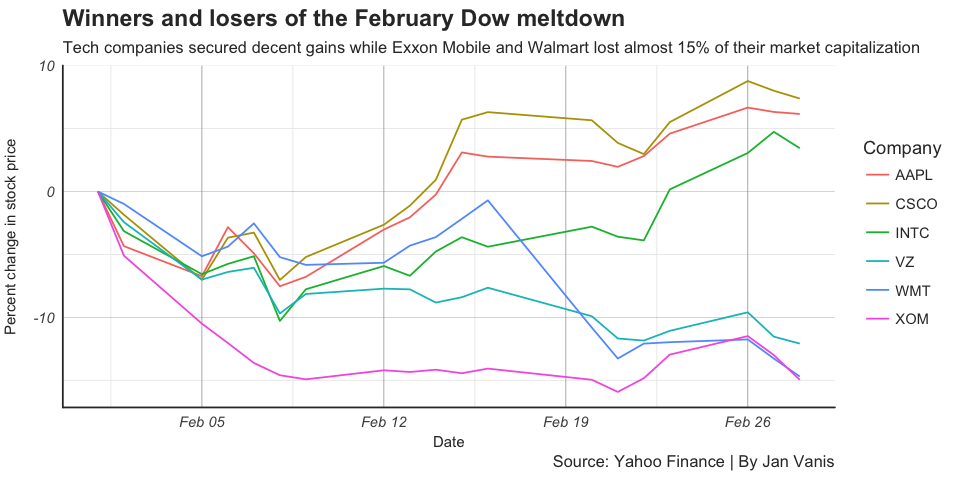

In [7]:
AllCompanies <- read.csv ("BA.csv")

AllCompanies2 <- AllCompanies %>%
filter(Company == "AAPL" | Company == "CSCO" | Company == "INTC" | Company == "VZ" | 
       Company == "WMT" | Company == "XOM") %>%
mutate(date2 = format(as.POSIXct(Date, format ="%m/%d/%y"),"%y-%m-%d")) %>%
group_by(Company)

options(repr.plot.width=8, repr.plot.height=4)
ggplot(AllCompanies2, aes(x=as.Date(date2))) + geom_line(aes(y=PctChange, col=Company)) +
labs(x="Date", y="Percent change in stock price", title="Winners and losers of the February Dow meltdown", 
     subtitle="Tech companies secured decent gains while Exxon Mobile and Walmart lost almost 15% of their market capitalization",
     caption="Source: Yahoo Finance | By Jan Vanis") +
theme_minimal() + 
    theme(text = element_text(color = "gray20"),
          axis.text = element_text(face = "italic"),
          plot.title = element_text(size = 14, face = "bold"),
          axis.title = element_text(size = 9),
          axis.title.x = element_text(vjust = -1),
          axis.title.y = element_text(vjust = 2), 
          axis.ticks.y = element_blank(), 
          axis.line.x = element_line(color = "gray20", size = 0.5),
          axis.line.y = element_line(color = "grey20", size = 0.5),
          panel.grid.major.x = element_line(color = "gray60", size = 0.2),
          panel.grid.major.y = element_line(color = "gray60", size = 0.1))

In [8]:
ggsave("AllCompanies2.pdf", width=8, height=4)

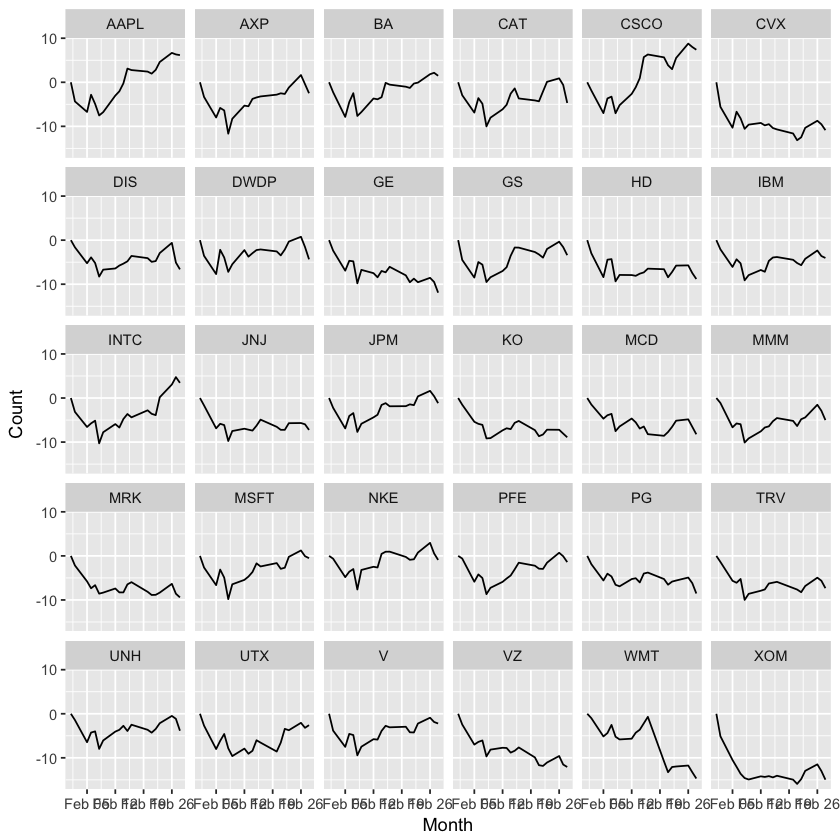

In [5]:
Boeing3 <- Boeing %>%
mutate(date2 = format(as.POSIXct(Date, format ="%m/%d/%y"),"%y-%m-%d")) %>%
group_by(Component, date2)

ggplot(Boeing3, aes(x=as.Date(date2), y=PctChange, group=1)) +
   geom_line() + labs(x="Month", y="Count") + facet_wrap(~Component)

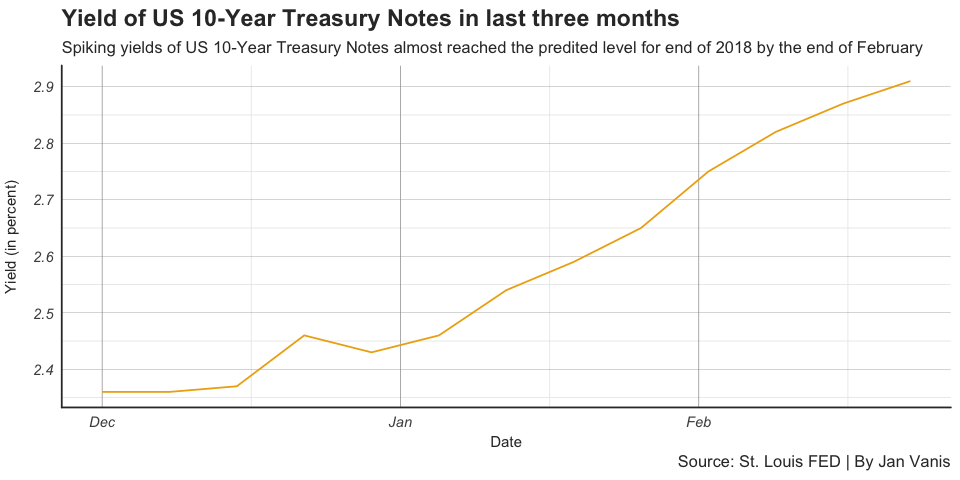

In [10]:
yields <- read.csv ("WGS10YR.csv")

options(repr.plot.width=8, repr.plot.height=4)
ggplot(yields, aes(x=as.Date(DATE), y=WGS10YR)) + geom_line(color="darkgoldenrod2") +
labs(x="Date", y="Yield (in percent)", title="Yield of US 10-Year Treasury Notes in last three months", 
     subtitle="Spiking yields of US 10-Year Treasury Notes almost reached the predited level for end of 2018 by the end of February",
     caption="Source: St. Louis FED | By Jan Vanis") +
theme_minimal() + 
    theme(text = element_text(color = "gray20"),
          axis.text = element_text(face = "italic"),
          axis.title.x = element_text(vjust = -1),
          plot.title = element_text(size = 14, face = "bold"),
          axis.title = element_text(size = 9),
          axis.title.y = element_text(vjust = 2), 
          axis.ticks.y = element_blank(), 
          axis.line.x = element_line(color = "gray20", size = 0.5),
          axis.line.y = element_line(color = "grey20", size = 0.5),
          panel.grid.major.x = element_line(color = "gray60", size = 0.2),
          panel.grid.major.y = element_line(color = "gray60", size = 0.1))

In [11]:
ggsave("yields.pdf", width=8, height=4)